In [32]:
import seaborn as sns
import matplotlib.font_manager
from scripts.path_utils import *
import scripts.fourier_utils as fourier_utils
import scripts.config as sconfig
from scripts.enums import Columns, Clusters, ContentType

In [33]:
sns.set(rc={'figure.figsize':(7,5),
            'axes.facecolor':'white',
            'axes.edgecolor': 'black',
            'axes.spines.top': False,
            'axes.spines.right': False,
            'figure.facecolor':'white',
            'font.family': 'Helvetica',
            'xtick.bottom': True,
            'ytick.left': True,
            'xtick.color': 'black',
            'ytick.color': 'black',
            'legend.frameon': False
            })

In [34]:
FREQ=.25
colormap = {i:c for i, c in zip(fourier_utils.similarity_measures.keys(), sns.color_palette("tab10", len(fourier_utils.similarity_measures)))}
config = sconfig.Config(date_from = '2020-01-22')
country_config = sconfig.CountryConfig(LABEL='ITA', TIME_ZONE='Europe/Rome')
TYPE='unverified'

# Activity

In [35]:
activity_path_manager = ActivityPathManager(config, country_config.LABEL, TYPE)
activity_decomposer = fourier_utils.Decomposer(Columns.ACTIVITY_WEIGHTED.value, Columns.CLUSTER.value, list(Clusters) + ['total'], list(Clusters), activity_path_manager)

In [36]:
nmax_per_cluster=activity_decomposer.get_nmax_per_cluster()
nmax_per_cluster

{'infrequent type': 3,
 'morning type': 4,
 'intermediate type': 3,
 'evening type': 3,
 'total': 3}

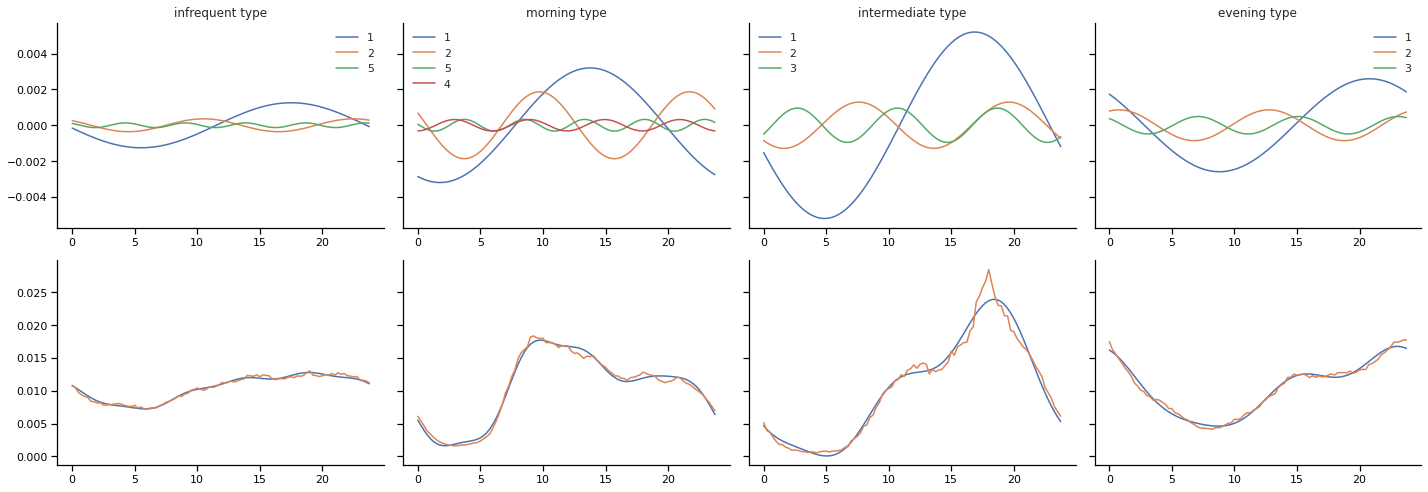

In [37]:
import matplotlib.font_manager
cluster_params_activity, cluster_recomb_activity = activity_decomposer.recombine_n_largest_frequencies(nmax_per_cluster)

In [38]:
waking_times = activity_decomposer.get_and_store_waking_times(cluster_recomb_activity)
waking_times

{'infrequent type': (9.0, 1.0),
 'morning type': (7.0, 23.0),
 'intermediate type': (8.0, 0.0),
 'evening type': (12.0, 4.0),
 'total': (9.0, 1.0)}

In [39]:
activity_stats = activity_decomposer.get_and_store_stats(cluster_recomb_activity, waking_times)
activity_stats

max                                  min  \
                    clock time hrs past waking  activity clock time   
cluster           i                                                   
infrequent type   0      19.00           10.00  0.012791       5.75   
                  1      14.25            5.25  0.012017      16.00   
morning type      0       9.75            2.75  0.017724       2.25   
                  1      19.25           12.25  0.012272      16.75   
intermediate type 0      18.50           10.50  0.023947       5.00   
evening type      0      23.00           11.00  0.016774       8.75   
                  1      15.75            3.75  0.012566      18.00   
total             0      19.00           10.00  0.012791       5.75   
                  1      14.25            5.25  0.012026      16.00   

                                               
                    hrs past waking  activity  
cluster           i                            
infrequent type   0           20.75  0.007240  
                  1            7.00  0.011793  
morning type      0           19.25  0.001620  
                  1            9.75  0.011407  
intermediate type 0           21.00  0.000058  
evening type      0           20.75  0.004607  
                  1            6.00  0.012058  
total             0           20.75  0.007232  
                  1            7.00  0.011802

In [40]:
activity_recomb = pd.DataFrame(cluster_recomb_activity.stack(), columns=[activity_decomposer.y_col])
activity_recomb.index.names = ['clock time', 'cluster']
activity_recomb.reset_index()
fourier_utils.align_signal_by_waking(activity_recomb, waking_times)
fourier_utils.align_signal_by_waking(activity_decomposer.signal_df, waking_times)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


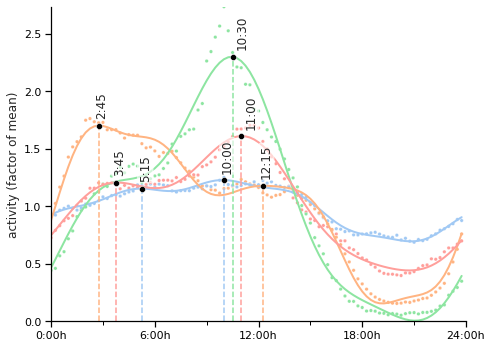

In [41]:
g = activity_decomposer.plot_aligned(activity_recomb, activity_stats, by="hrs past waking", factor_of_baseline=True, hatch_area=False, ampm=False)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<AxesSubplot:ylabel='activity (factor of mean)'>

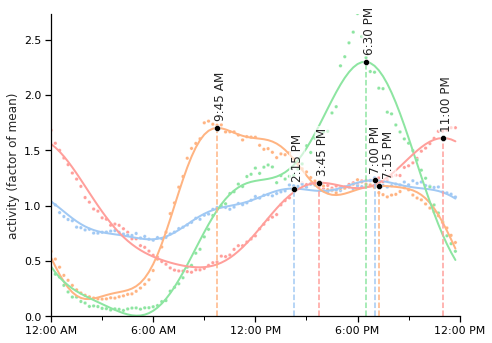

In [42]:
activity_decomposer.plot_aligned(activity_recomb, activity_stats, by="clock time", factor_of_baseline=True, hatch_area=False, ampm=True)

# Ratio of potentially machinated content

In [43]:
ratio_path_manager = MachinatedPathManager(config, country_config.LABEL, TYPE)
ratio_decomposer = fourier_utils.Decomposer(Columns.RATIO_BY_USER.value, Columns.CLUSTER.value, list(Clusters) + ['total'], list(Clusters), ratio_path_manager)
ratio_decomposer.smooth_over_signal()

In [44]:
nmax_per_cluster=ratio_decomposer.get_nmax_per_cluster(n=(1,3))
nmax_per_cluster

{'infrequent type': 2,
 'morning type': 2,
 'intermediate type': 2,
 'evening type': 2,
 'total': 2}

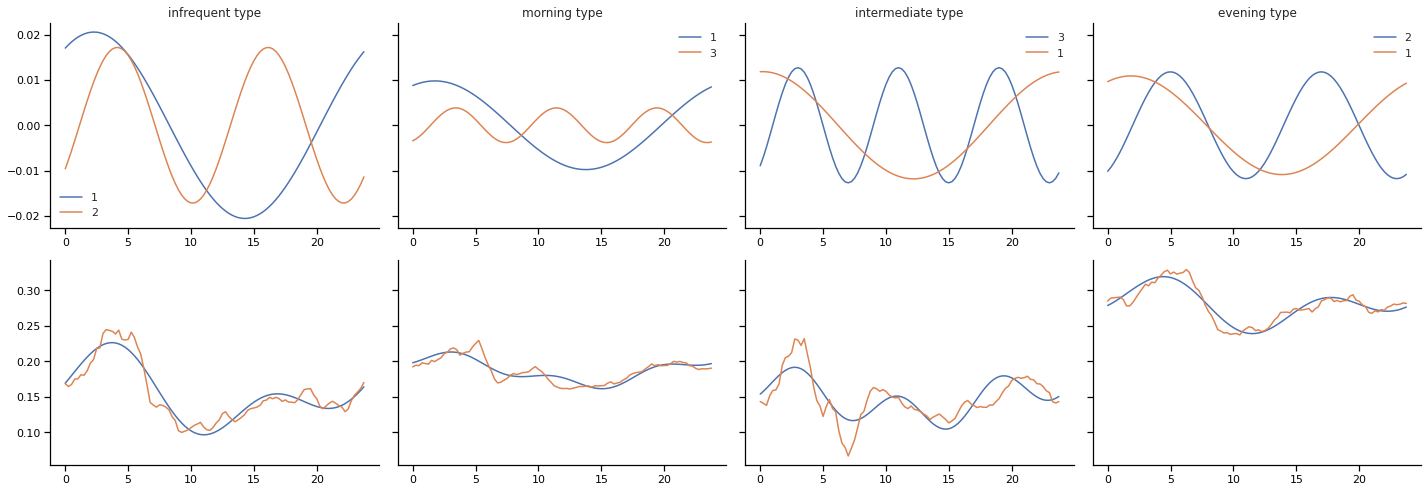

In [45]:
cluster_params_ratio, cluster_recomb_ratio = ratio_decomposer.recombine_n_largest_frequencies(nmax_per_cluster)

In [46]:
ratio_stats = ratio_decomposer.get_and_store_stats(cluster_recomb_ratio, waking_times)
ratio_stats

max                                   min  \
                    clock time hrs past waking machinated clock time   
cluster           i                                                    
infrequent type   0       3.75           18.75   0.226314      11.00   
                  1      16.75            7.75   0.154248      21.00   
morning type      0       3.00           20.00   0.213134      15.00   
                  1      20.75           13.75   0.196179       8.75   
                  2      10.50            3.50   0.180202      22.50   
intermediate type 0       2.75           18.75   0.191649      14.75   
                  1      19.25           11.25   0.179529       7.25   
                  2      10.75            2.75   0.151077      22.75   
evening type      0       4.50           16.50   0.319087      11.50   
                  1      17.75            5.75   0.289835      22.25   
total             0       3.75           18.75   0.226319      11.00   
                  1      16.75            7.75   0.154181      21.00   

                                                
                    hrs past waking machinated  
cluster           i                             
infrequent type   0            2.00   0.096662  
                  1           12.00   0.133732  
morning type      0            8.00   0.161492  
                  1            1.75   0.178448  
                  2           15.50   0.194424  
intermediate type 0            6.75   0.104605  
                  1           23.25   0.116725  
                  2           14.75   0.145177  
evening type      0           23.50   0.238990  
                  1           10.25   0.270445  
total             0            2.00   0.096539  
                  1           12.00   0.133533

In [47]:
ratio_recomb = pd.DataFrame(cluster_recomb_ratio.stack(), columns=[ratio_decomposer.y_col])
ratio_recomb.index.names = ['clock time', 'cluster']
ratio_recomb.reset_index()
fourier_utils.align_signal_by_waking(ratio_recomb, waking_times)
fourier_utils.align_signal_by_waking(ratio_decomposer.signal_df, waking_times)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


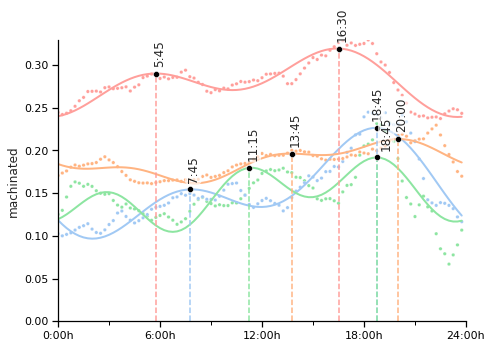

In [48]:
g = ratio_decomposer.plot_aligned(ratio_recomb, ratio_stats, by="hrs past waking", factor_of_baseline=False, hatch_area=False, ampm=False)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<AxesSubplot:ylabel='machinated'>

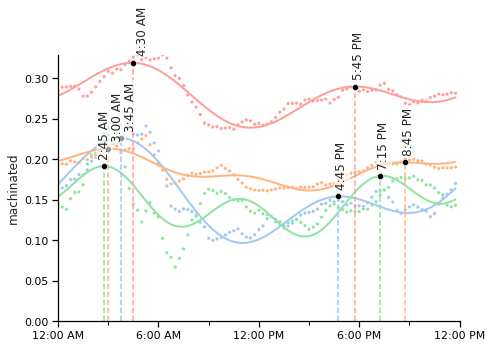

In [49]:
ratio_decomposer.plot_aligned(ratio_recomb, ratio_stats, by="clock time", factor_of_baseline=False, hatch_area=False, ampm=True)

## Save curves

In [50]:
activity_path_manager.save(activity_recomb, "fourier")
ratio_path_manager.save(ratio_recomb, "fourier")

In [51]:
import pickle
with open(get_waking_time_path(config, country_config, TYPE), 'wb') as f:
    pickle.dump(waking_times, f, pickle.HIGHEST_PROTOCOL)

# Unverified VS all

In [52]:
activity_path_manager_all=ActivityPathManager(config, country_config.LABEL, user_type='all')
ratio_path_manager = MachinatedPathManager(config, country_config.LABEL, user_type='all')

In [53]:
import pickle

with open(get_waking_time_path(config, country_config, 'all'),"rb") as f:
    waking_times_all = pickle.load(f)

In [54]:
activity_all = activity_path_manager_all.load('signal')[[activity_decomposer.y_col]]
activity_smoothed_all = activity_path_manager_all.load('fourier')[[activity_decomposer.y_col]]
fourier_ratio_all = ratio_path_manager.load('fourier')[[ratio_decomposer.y_col]]
activity_all.index.names=['clock time', 'cluster']
fourier_ratio_all.index.names=['clock time', 'cluster']

In [55]:
for df,c in zip(
        (activity_smoothed_all, activity_all, fourier_ratio_all),
        (activity_decomposer.y_col, activity_decomposer.y_col, ratio_decomposer.y_col)):
    for i in df.index.unique(activity_decomposer.cluster_col):
        if i not in activity_decomposer.calculate_clusters:
            df.drop(index=i, level=activity_decomposer.cluster_col, inplace=True)

    fourier_utils.align_signal_by_waking(df, waking_times_all)

In [56]:
stats_all_activity = activity_decomposer.get_and_store_stats(activity_smoothed_all[activity_decomposer.y_col].unstack(), store=False, waking_times=waking_times_all)
stats_all_ratio = ratio_decomposer.get_and_store_stats(fourier_ratio_all[ratio_decomposer.y_col].unstack(), store=False, waking_times=waking_times_all)

In [57]:
maxylim=activity_decomposer.signal_df.groupby(activity_decomposer.cluster_col)[activity_decomposer.y_col].max().max()

<p id="SupplFig2a">Supplementary Figure 2a: activity by waking time</p>

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


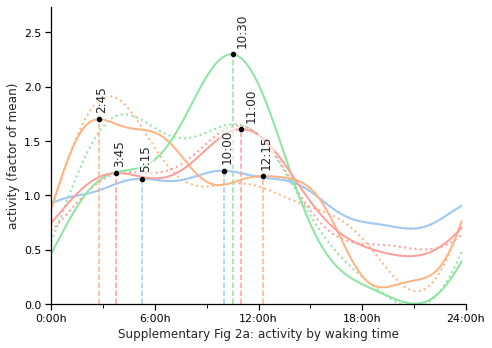

In [58]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
usex="hrs past waking"

def prep_df(df, rename_dict=None, usex="clock time"):
    if rename_dict is None:
        rename_dict = {}
    return (df
            .loc[df.index.get_level_values(level=Columns.CLUSTER.value)!='total']
            .rename(columns=rename_dict)
            .reset_index()
            .set_index([usex, Columns.CLUSTER.value]))

g = fourier_utils.align_and_plot_orig_and_recomp(
    prep_df(activity_all, usex=usex),
    prep_df(activity_smoothed_all, usex=usex),
    stats_all_activity,
    t_col=usex, xlabel=usex,
    annotate=0, ls=":", y=activity_decomposer.y_col, ylabel="activity (factor of mean)", maxylim=maxylim, scatter_alpha=0)

g = fourier_utils.align_and_plot_orig_and_recomp(
    prep_df(activity_decomposer.signal_df, usex=usex),
    prep_df(activity_recomb, usex=usex),
    activity_stats,
    t_col=usex, xlabel=usex,
    y=activity_decomposer.y_col, ylabel="activity (factor of mean)",
    annotate=2, ax=g, maxylim=maxylim, scatter_alpha=0)


g.set_ylabel("activity (factor of mean)")
baseline=1/len(activity_recomb.index.unique(level=0))
g.axes.yaxis.set_major_locator(mticker.FixedLocator([baseline*i/2 for i in range(6)]))
g.axes.yaxis.set_major_formatter(mticker.FixedFormatter([i/2 for i in range(6)]))
plt.tight_layout()
g.get_figure().savefig(f"{config.SAVE_ROOT_DIR}{country_config.LABEL}_comparison_activity_waking_unverified_vs_all.eps")
g.set_xlabel("Supplementary Fig 2a: activity by waking time");

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


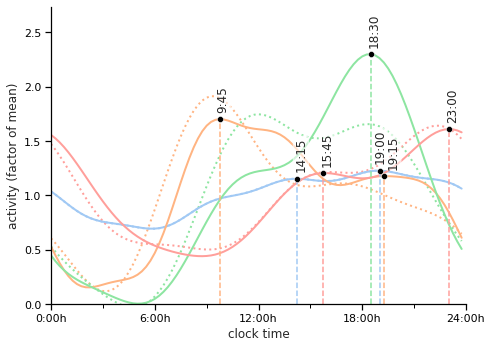

In [59]:
usex="clock time"

g = fourier_utils.align_and_plot_orig_and_recomp(
    prep_df(activity_all, usex=usex),
    prep_df(activity_smoothed_all, usex=usex),
    stats_all_activity,
    t_col=usex, xlabel=usex,
    annotate=0, y=activity_decomposer.y_col, ls=":", ylabel="activity (factor of mean)", maxylim=maxylim, scatter_alpha=0)

g = fourier_utils.align_and_plot_orig_and_recomp(
    prep_df(activity_decomposer.signal_df, usex=usex),
    prep_df(activity_recomb, usex=usex),
    activity_stats,
    t_col=usex, xlabel=usex,
    y=activity_decomposer.y_col, ylabel="activity (factor of mean)",
    annotate=2, ax=g,  maxylim=maxylim, scatter_alpha=0)


g.set_ylabel("activity (factor of mean)")
baseline=1/len(activity_recomb.index.unique(level=0))
g.axes.yaxis.set_major_locator(mticker.FixedLocator([baseline*i/2 for i in range(6)]))
g.axes.yaxis.set_major_formatter(mticker.FixedFormatter([i/2 for i in range(6)]))
plt.tight_layout()
g.get_figure().savefig(f"{config.SAVE_ROOT_DIR}{country_config.LABEL}_comparison_activity_clocktime_unverified_vs_all.eps")

In [60]:
maxylim=ratio_decomposer.signal_df.groupby(ratio_decomposer.cluster_col)[ratio_decomposer.y_col].max().max()

<p id="SupplFig2b">Supplementary Figure 2b: ratio by time of day</p>

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


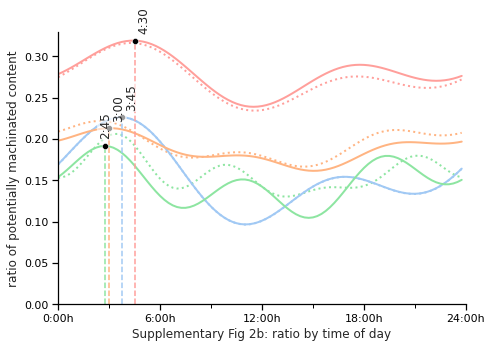

In [61]:
usex="clock time"

g = fourier_utils.align_and_plot_orig_and_recomp(
    prep_df(fourier_ratio_all, usex=usex),
    prep_df(fourier_ratio_all, usex=usex),
    stats_all_ratio,
    t_col=usex, xlabel=usex,
    annotate=0, ls=":", y=ratio_decomposer.y_col, ylabel="ratio of potentially machinated content", maxylim=maxylim, scatter_alpha=0)

g = fourier_utils.align_and_plot_orig_and_recomp(
    prep_df(ratio_recomb, usex=usex),
    prep_df(ratio_recomb, usex=usex),
    ratio_stats,
    t_col=usex, xlabel=usex,
    y=ratio_decomposer.y_col, ylabel="ratio of potentially machinated content",
    annotate=1, ax=g, maxylim=maxylim, scatter_alpha=0)


plt.tight_layout()
g.get_figure().savefig(f"{config.SAVE_ROOT_DIR}{country_config.LABEL}_comparison_ratio_clocktime_unverified_vs_all.eps")
g.set_xlabel("Supplementary Fig 2b: ratio by time of day");

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


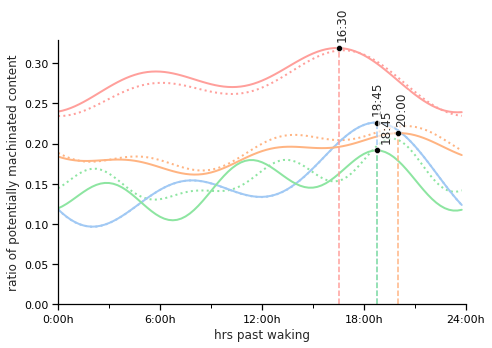

In [62]:
usex="hrs past waking"

g = fourier_utils.align_and_plot_orig_and_recomp(
    prep_df(fourier_ratio_all, usex=usex),
    prep_df(fourier_ratio_all, usex=usex),
    stats_all_ratio,
    t_col=usex, xlabel=usex, annotate=0,
    ls=":", y=ratio_decomposer.y_col, ylabel="ratio of potentially machinated content", maxylim=maxylim, scatter_alpha=0)

g = fourier_utils.align_and_plot_orig_and_recomp(
    prep_df(ratio_recomb, usex=usex),
    prep_df(ratio_recomb, usex=usex),
    ratio_stats,
    t_col=usex, xlabel=usex,
    y=ratio_decomposer.y_col, ylabel="ratio of potentially machinated content",
    annotate=1, ax=g, maxylim=maxylim, scatter_alpha=0)


plt.tight_layout()
g.get_figure().savefig(f"{config.SAVE_ROOT_DIR}{country_config.LABEL}_comparison_ratio_hrs_past_waking_unverified_vs_all.eps")